This is the tutorial for protein property function. The dataset that we use is called beta lactamase.

First we import all necessary packages.

In [1]:
import os
import sys
import argparse
import torch
import wandb
sys.path.append(os.path.abspath('..'))

from DeepProtein.dataset import *
import DeepProtein.utils as utils
import DeepProtein.ProteinPred as models

Next we fix some hyperparamaters. Here we make wandb local.

In [2]:
wandb.init(mode='offline', name = "PPI_Affinity")

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


In [3]:
lr = 0.0001
epochs = 20
batch_size = 32
seed = 7
target_encoding = "CNN" # test only

Next we load our dataset

In [4]:
train_beta = Beta_lactamase('../DeepProtein/data', 'train')
valid_beta = Beta_lactamase('../DeepProtein/data', 'valid')
test_beta = Beta_lactamase('../DeepProtein/data', 'test')

In [5]:
train_protein_processed, train_target, train_protein_idx = collate_fn(train_beta)
valid_protein_processed, valid_target, valid_protein_idx = collate_fn(valid_beta)
test_protein_processed, test_target, test_protein_idx = collate_fn(test_beta)

In [6]:
train, _, _ = utils.data_process(X_target=train_protein_processed, y=train_target, target_encoding=target_encoding,
                                    # drug_encoding= drug_encoding,
                                    split_method='random', frac=[0.99998, 1e-5, 1e-5],
                                    random_seed=1)

_, val, _ = utils.data_process(X_target=valid_protein_processed, y=valid_target, target_encoding=target_encoding,
                                # drug_encoding= drug_encoding,
                                split_method='random', frac=[1e-5, 0.99998, 1e-5],
                                random_seed=1)

_, _, test = utils.data_process(X_target=test_protein_processed, y=test_target, target_encoding=target_encoding,
                                # drug_encoding= drug_encoding,
                                split_method='random', frac=[1e-5, 1e-5, 0.99998],
                                random_seed=1)

Protein Function Prediction Mode...
in total: 4158 proteins
encoding protein...
unique target sequence: 4158
Done.
Protein Function Prediction Mode...
in total: 520 proteins
encoding protein...
unique target sequence: 520
Done.
Protein Function Prediction Mode...
in total: 520 proteins
encoding protein...
unique target sequence: 520
Done.


Load configuration

In [7]:

config = generate_config(target_encoding=target_encoding,
                            cls_hidden_dims=[1024, 1024],
                            train_epoch=epochs,
                            LR=lr,
                            batch_size=batch_size ,
                            )
config['multi'] = False

Set seed

In [8]:
torch.manual_seed(seed)


Load model and train

Let's use 1 GPU!
--- Data Preparation ---
--- Go for Training ---


e:\anaconda3\envs\graph\lib\site-packages\torch\autograd\graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\cudnn\Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Training at Epoch 1 iteration 0 with loss 0.60325. Total time 0.00611 hours
Training at Epoch 1 iteration 100 with loss 0.14836. Total time 0.00722 hours
Validation at Epoch 1 , MAE: 0.28039 , MSE: 0.10288 , Spearman Correlation: 0.03946 with p-value: 3.69E-01 , Concordance Index: 0.51339
Training at Epoch 2 iteration 0 with loss 0.11994. Total time 0.01972 hours
Training at Epoch 2 iteration 100 with loss 0.11785. Total time 0.02111 hours
Validation at Epoch 2 , MAE: 0.25531 , MSE: 0.09920 , Spearman Correlation: 0.07149 with p-value: 1.03E-01 , Concordance Index: 0.52361
Training at Epoch 3 iteration 0 with loss 0.09509. Total time 0.03361 hours
Training at Epoch 3 iteration 100 with loss 0.15386. Total time 0.035 hours
Validation at Epoch 3 , MAE: 0.25639 , MSE: 0.09914 , Spearman Correlation: 0.19788 with p-value: 5.45E-06 , Concordance Index: 0.56621
Training at Epoch 4 iteration 0 with loss 0.12765. Total time 0.0475 hours
Training at Epoch 4 iteration 100 with loss 0.08382. Tota

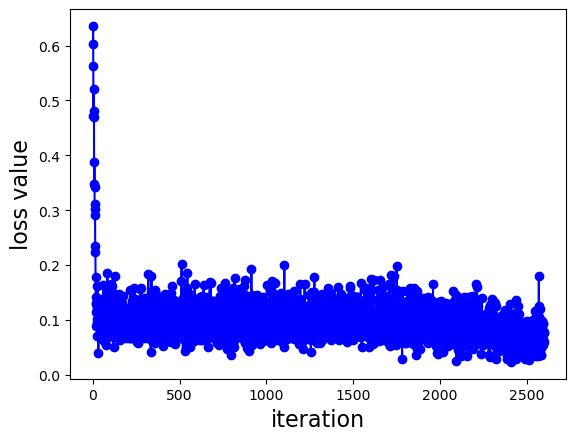

In [9]:
model = models.model_initialize(**config)
model.train(train, val, test, compute_pos_enc = False)